In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
import sys

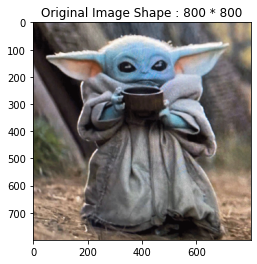

In [0]:
original_image = image.imread('/content/drive/My Drive/Data Mining/HW2/data/image.png')
plt.title("Original Image Shape : 800 * 800")
plt.imshow(original_image)
plt.show()

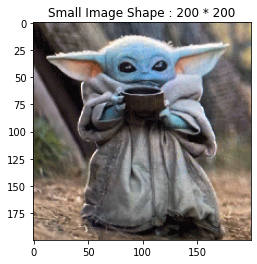

In [0]:
small_image = image.imread('/content/drive/My Drive/Data Mining/HW2/data/imageSmall.png')
plt.title("Small Image Shape : 200 * 200")
plt.imshow(small_image)
plt.show()

In [0]:
img_reshaped = original_image.reshape((original_image.shape[0]*original_image.shape[1], original_image.shape[2]))
colors_in_img = np.unique(img_reshaped, return_counts=False)
print("There are ",len(colors_in_img)," different colors in original Image")

There are  198  different colors in original Image


In [0]:
Small_image_reshaped = small_image.reshape((small_image.shape[0]*small_image.shape[1], small_image.shape[2]))
colors_in_small_image = np.unique(Small_image_reshaped, return_counts=False)
print("There are ",len(colors_in_small_image)," different colors in Small Image")

There are  195  different colors in Small Image


In [0]:
def centroid_k_init(my_data, k):
    print("initilizing centroids with kmeans++")
    centroids = [] 
    rand_point = np.random.randint(my_data.shape[0])
    centroids.append(my_data[rand_point])
    for c_id in range(k - 1): 
        dist = [] 
        for i in range(my_data.shape[0]): 
            point = my_data[i] 
            d = sys.maxsize 
            for j in range(len(centroids)): 
                temp_dist = np.linalg.norm(point-centroids[j])
                d = min(d, temp_dist) 
            dist.append(d) 
            
        dist = np.array(dist) 
        next_centroid = my_data[np.argmax(dist)]
        centroids.append(next_centroid) 
        dist = [] 
        print("centroid :", c_id)
    return centroids 

In [0]:
def centroid_r_init(my_data, k):
    random_index = []
    random_centroids = []
    counter = 0
    while True:
        rand = np.random.randint(low=0, high=my_data.shape[0] - 1)
        
        if rand not in random_index:
            random_index.append(rand)
            counter += 1 
        if counter == k:
            break
        
    for index in random_index:
        random_centroids.append(my_data[index])
    
    print(len(random_centroids))
    return np.array(random_centroids)

In [0]:
def find_nearest_centroid(my_data, centroids):
    labels = []
    for data in my_data:
        min_dist = sys.maxsize
        c_index = 0
        for c in range(centroids.shape[0]):
            dist = np.linalg.norm(data-centroids[c])
            if dist < min_dist:
                min_dist = dist
                c_index = c
        labels.append(c_index)
        
    return labels

In [0]:
def find_new_centroids(my_data, labels, k, centroids):
    centroid_sum = np.zeros((k, my_data.shape[1]))
    count = np.zeros(k)
    change = True
    new_centroids = np.zeros((k, my_data.shape[1]))
    for i in range(my_data.shape[0]):
        c_index = labels[i]
        centroid_sum[c_index] = np.add(centroid_sum[c_index], my_data[i])
        count[c_index] +=1
    ##calculating new centroids!
    for i in range(k):
        if count[i] != 0:
            new_centroids[i] = centroid_sum[i]/count[i]
        else: 
            new_centroids[i] = centroids[i]
    
    if np.array_equal(new_centroids, centroids):
        change = False
    
    return new_centroids, change

In [0]:
def kmeans(my_data, k, init_method, iteration, convergence, details):
    if init_method == "k":
        centroids = np.array(centroid_k_init(my_data, k))
    elif init_method == "r":
        centroids = centroid_r_init(my_data, k)
    labels = []
    print("Kmeans starts")
    if convergence == True:
        change = True
        if details:
            print("kmeans will stop when convergence occure")
        counter = 0
        limit = 50 
        while change:
            if details:
                print("Iteration number: ", counter)
            labels = find_nearest_centroid(my_data, centroids)
            centroids, change = find_new_centroids(my_data, labels, k, centroids)
            counter += 1
            if counter > limit:
                print("Reached to the limit of :"+str(limit))
                break
    if convergence == False: 
        if details:
            print("kmeans will stop after given iterations")
        for i in range(iteration):
            if details:
                print("Iteration number :", i)
            labels = find_nearest_centroid(my_data, centroids)
            centroids, _ = find_new_centroids(my_data, labels, k, centroids)
    return centroids, labels

In [0]:
def image_compressor(original_image, k, kmeans_init_method):
    x, y, z = original_image.shape
    reshaped_image = original_image.reshape((x*y, z))
    print(reshaped_image.shape)
    centroids, labels = kmeans(my_data= reshaped_image, k= k, init_method=kmeans_init_method, iteration= 0, convergence= True, details= True)
    new_image = np.zeros((x*y, z))
    print(new_image.shape)
    for i in range(new_image.shape[0]):
        new_image[i] = centroids[labels[i]]

    new_image = new_image.reshape((x, y, z))
    print(new_image.shape)
    title_name = "Compressed Image with k = " + str(k)+ " for "+str(x)+"*"+str(y)+" image"
    plt.title(title_name)
    plt.imshow(new_image)
    plt.show()
    
    image_name = title_name+ ".png"
    image.imsave(image_name, new_image)

(40000, 3)
initilizing centroids with kmeans++
centroid : 0
centroid : 1
centroid : 2
centroid : 3
centroid : 4
centroid : 5
centroid : 6
centroid : 7
centroid : 8
centroid : 9
centroid : 10
centroid : 11
centroid : 12
centroid : 13
centroid : 14
Kmeans starts
kmeans will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
Iteration number:  5
Iteration number:  6
Iteration number:  7
(40000, 3)
(200, 200, 3)


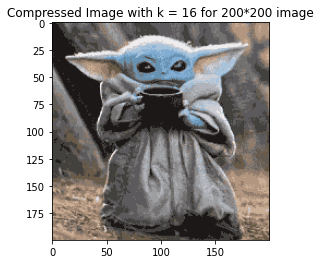

In [0]:
new_image = image_compressor(small_image, 16, kmeans_init_method="k")

(40000, 3)
256
Kmeans starts
kmeans will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
Iteration number:  5
(40000, 3)
(200, 200, 3)


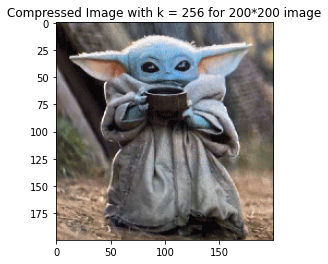

In [0]:
new_image = image_compressor(small_image, 256, kmeans_init_method="r")

(640000, 3)
16
Kmeans starts
kmeans will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
Iteration number:  5
Iteration number:  6
Iteration number:  7
Iteration number:  8
Iteration number:  9
Iteration number:  10
Iteration number:  11
Iteration number:  12
Iteration number:  13
Iteration number:  14
Iteration number:  15
Iteration number:  16
Iteration number:  17
(640000, 3)
(800, 800, 3)


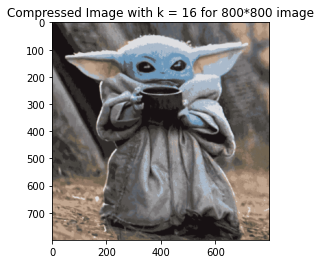

In [0]:
new_image = image_compressor(original_image, 16, kmeans_init_method="r")

(640000, 3)
256
Kmeans starts
kmeans will stop when convergence occure
Iteration number:  0
Iteration number:  1
Iteration number:  2
Iteration number:  3
Iteration number:  4
(640000, 3)
(800, 800, 3)


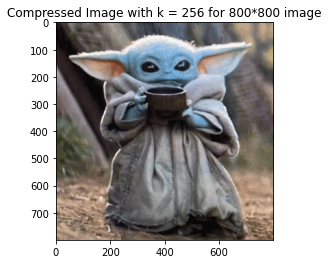

In [0]:
new_image = image_compressor(original_image, 256, kmeans_init_method="r")